In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Assignments/Simple Linear Regression'

Mounted at /content/drive
'Copy of Simple_Linear_Regression_DeliveryTime.ipynb'
 delivery_time.csv
 Problem_statements.txt
 Salary_Data.csv
 Simple_Linear_Regression_DeliveryTime.ipynb


In [2]:
import os
os.getcwd()
os.chdir('drive/My Drive/Assignments/Simple Linear Regression')
os.getcwd()
os.listdir()

['Salary_Data.csv',
 'delivery_time.csv',
 'Problem_statements.txt',
 'Simple_Linear_Regression_DeliveryTime.ipynb',
 'Copy of Simple_Linear_Regression_DeliveryTime.ipynb']

Q: Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


## Step 1

Importing Data

In [4]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Step 2

# Performing EDA on coloumns

Checking Data type

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Checking for Null values

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Checking for duplicated values

In [8]:
df.duplicated()
df[df.duplicated()]

,YearsExperience,Salary


# Step 3

Plotting data to check for outliers

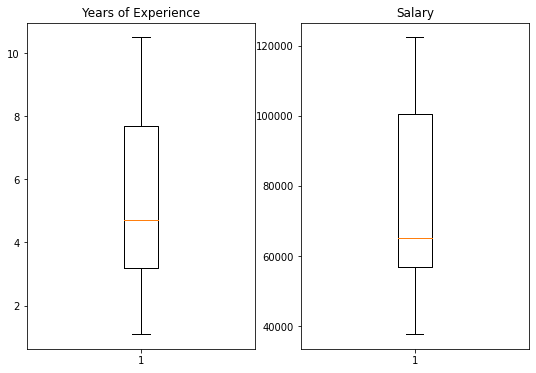

In [10]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

It can be concluded that there are no outliers in the data

# Step 4

Check for correlation between the variables

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of Correlation beteen x and y

<Axes: xlabel='YearsExperience', ylabel='Salary'>

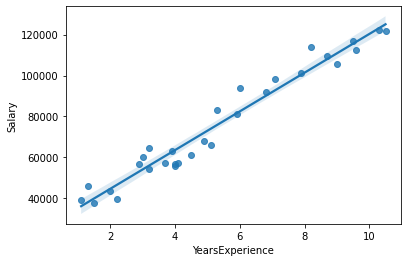

In [12]:
sns.regplot(x=df['YearsExperience'],y=df['Salary']) 

It can be concluded that there is a strong correlation between the two variables. The correlation coefficient is 0.895which shows the strong relation.

# Step 5

# Feature Engineering
Apply different transformation of data to estimate normal distribution and to remove any skewness to the delivary time column


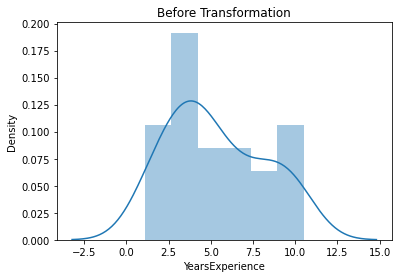

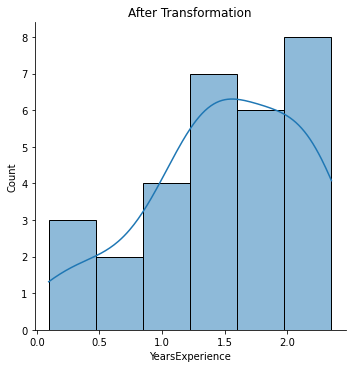

In [13]:
sns.distplot(df['YearsExperience'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

It can be concluded that the data is normally distributed without any outliers. There is also no significant skewness.

# Plotting the QQ plot of Delivary time coloumn to check for normal distribution of data before and after transformation

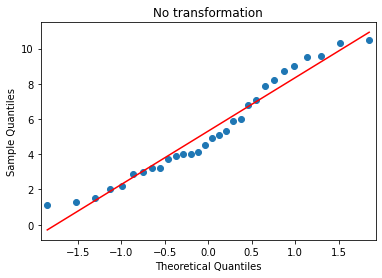

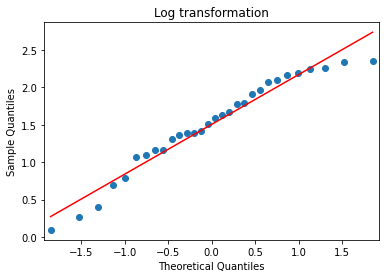

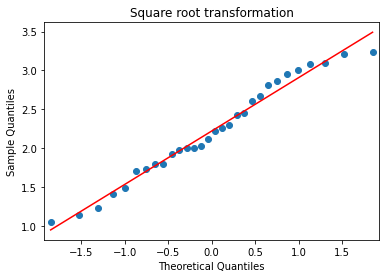

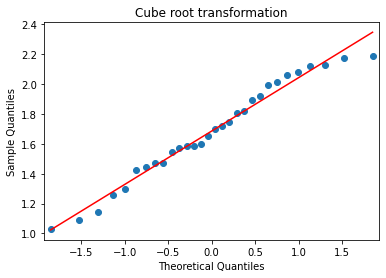

In [14]:
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Similar plots for Sorting time coloumn

Apply different transformation of data to estimate normal distribution and to remove any skewness to the Sorting time column

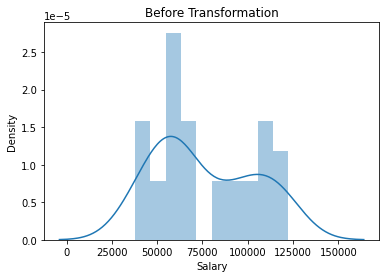

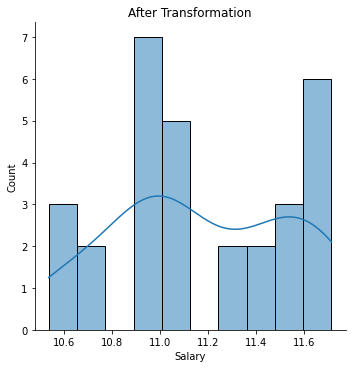

In [15]:
sns.distplot(df['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

It can be seen that the data is normally distributed around the mean 6 before transformation. So no transformation is required to be applied to the data before model fitting.

# Plotting the QQ plot of Sorting time coloumn to check for normal distribution of data before and after transformation

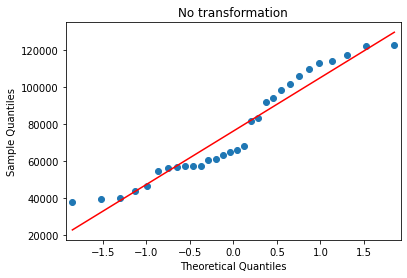

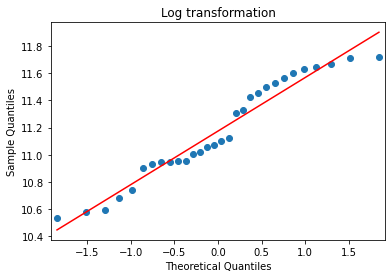

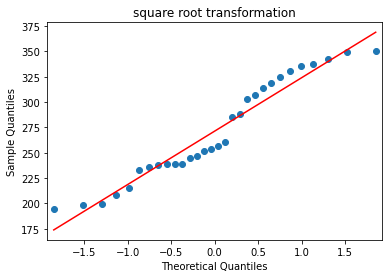

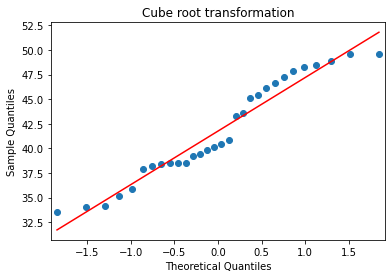

In [16]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

It can be concluded that for both the Delivary time and Sorting time the data is distributed evenly and closely around the reference line is a straight line that shows how the data points are distributed as they follow a normal distribution. 

# Step 6

# Fitting a Linear Regression Model

Method 1

Using Ordinary least squares (OLS) regression

In [34]:
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        14:44:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that

*   The R-squared and Adjusted R-squared scores are above 0.85.
*   (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
*   Lets Try some data transformation to check whether these scores can get any higher than this.




# Square Root transformation on data

In [35]:
square_root_model = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        14:44:26   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be concluded that


*  After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have decreased but they are still above 0.85 which is a thumb rule we consider for a good model for prediction.




# Cube Root transformation on Data

In [38]:
cube_root_model = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        14:45:27   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that 

*   After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have decreased but they are still above 0.85 which is a thumb rule we consider for a good model for prediction.





# Log transformation on Data

In [37]:
log_model = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        14:45:20   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# It can be concluded that


* Both Adjusted R-squared and R-squared scores are still above 0.85 which is a thumb rule we consider for a good model for prediction.






# We will be using model without any transformation

# Step 7
# Model Testing
As Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)

In [39]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [49]:
log_model.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

# Step 8

Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

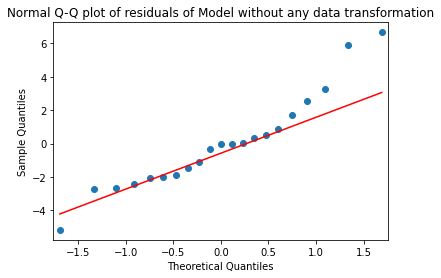

In [ ]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

With log transformed data

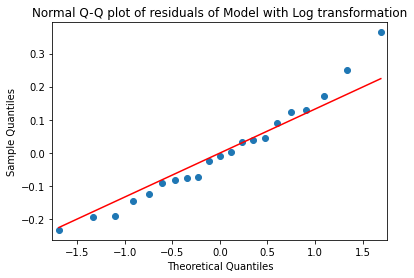

In [ ]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

* Both The Model have slightly different plots
* The first model is right skewed and doesn't follow normal distribution
* The second model after log-transformation follows normal distributon with less skewness than first model

# Residual Plot to check Homoscedasticity or Hetroscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

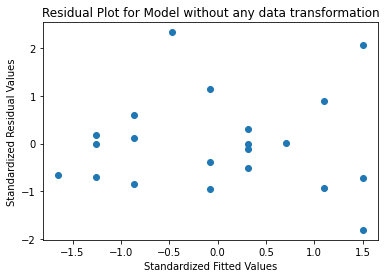

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

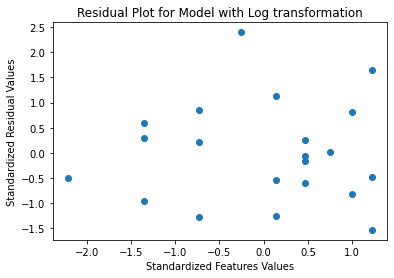

In [ ]:
plt.scatter(get_standardized_values(log_model.fittedvalues), get_standardized_values(log_model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# It can be concluded that 

* Both The Model have Homoscedasciticity.
* The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
* Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed


# Step 9

# Model Validation
Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — i.e. the average distance between the model’s predicted target value and the actual target value.

In [27]:
from sklearn.metrics import mean_squared_error

In [43]:
square_root_pred_y =np.square(square_root_model.predict(df['YearsExperience']))
cube_root_pred_y =pow(cube_root_model.predict(df['YearsExperience']),3)
log_model_pred_y =np.exp(log_model.predict(df['YearsExperience']))
square_root_pred_y

0      33447.371655
1      36022.521569
2      38491.193991
3      44318.949727
4      46544.135171
5      53989.336270
6      55017.323598
7      57051.041838
8      57051.041838
9      62020.592218
10     63968.149237
11     64934.197889
12     64934.197889
13     65895.350251
14     69694.405347
15     73427.656958
16     75272.141554
17     77103.018416
18     82521.300854
19     83414.349494
20     90467.971458
21     93075.167881
22     99939.557841
23    102483.605120
24    106690.705528
25    109196.426832
26    113343.921252
27    114169.320200
28    119911.347953
29    121540.993172
dtype: float64

In [44]:
square_root_rmse =np.sqrt(mean_squared_error(df['Salary'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(df['Salary'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(df['Salary'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 5788.315051119395 
square_root_model= 5960.647096174318 
cube_root_model= 6232.815455835847 
log_model= 7219.716974372806


In [45]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'model'

As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

# Step 10
Predicting values from Model with Log Transformation on the Data

In [46]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = df.YearsExperience
predicted['Salary'] = df.Salary
predicted['Predicted_Salary'] = pd.DataFrame(np.exp(log_model.predict(predicted.YearsExperience)))
predicted

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,32261.052293
1,1.3,46205.0,35437.122429
2,1.5,37731.0,38405.293942
3,2.0,43525.0,45145.842502
4,2.2,39891.0,47630.388981
5,2.9,56642.0,55631.518478
6,3.0,60150.0,56701.779991
7,3.2,54445.0,58796.479782
8,3.2,64445.0,58796.479782
9,3.7,57189.0,63795.788170


Predicitng from Original Model without any data transformation

In [48]:
predicted1 = pd.DataFrame()
predicted1['YearsExperience'] = df.YearsExperience
predicted1['Salary'] = df.Salary
predicted1['Predicted_Salary'] = pd.DataFrame(model.predict(predicted1.YearsExperience))
predicted1

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
